In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import sem

In [2]:
college_enrollment_to_load = "../userssharedsdfperc18to24yoenrld24ycsre20002012.csv"
college_enrollment = pd.read_csv(college_enrollment_to_load)

In [3]:
college_enrollment_cleaned = college_enrollment.dropna(subset = ["Sex", "Race/ethnicity"])
college_enrollment_reduced = college_enrollment_cleaned[["Race/ethnicity", "Sex", "Year", "Percentage", 
                                                         "Standard Error on Percentage", "Count (in thousands)", 
                                                         "Standard Error on Count (in thousands)"]]

college_enrollment_reduced["Percentage"]=college_enrollment_reduced.Percentage.str.replace('%', " ").astype(float)
college_enrollment_reduced

//anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Race/ethnicity,Sex,Year,Percentage,Standard Error on Percentage,Count (in thousands),Standard Error on Count (in thousands)
130,"White, non-Hispanic",Male,2000,36.2,0.79,3136.0,85.0
131,"White, non-Hispanic",Male,2001,37.2,0.79,3291.0,87.0
132,"White, non-Hispanic",Male,2002,38.9,0.77,3287.0,83.0
133,"White, non-Hispanic",Male,2003,38.5,0.77,3291.0,83.0
134,"White, non-Hispanic",Male,2004,38.4,0.76,3322.0,83.0
...,...,...,...,...,...,...,...
307,"Two or more races, non-Hispanic",Female,2008,48.7,5.17,110.0,16.0
308,"Two or more races, non-Hispanic",Female,2009,41.0,4.65,111.0,16.0
309,"Two or more races, non-Hispanic",Female,2010,35.8,5.23,92.0,15.0
310,"Two or more races, non-Hispanic",Female,2011,46.0,5.07,123.0,16.0


In [4]:
# Create DataFrame with percentage enrollment 
cleaned_pct = college_enrollment_reduced[['Year', 'Sex', 'Percentage']]

# # # Group percent enrolled by year and sex
pct_grouped = cleaned_pct.groupby(["Year", "Sex"])
pct_sex=pct_grouped.mean()

df = pd.pivot_table(pct_sex, index=['Year'], columns = "Sex")
df1=df["Percentage"]
df1 = df1.reset_index()

In [5]:
# Create DataFrame with standard error
cleaned_ser = college_enrollment_reduced[['Year', 'Sex', 'Standard Error on Percentage']]

# #standard error
ser_grouped = cleaned_ser.groupby(["Year", "Sex"])
ser_by_sex = ser_grouped.mean()

df2 = pd.pivot_table(ser_by_sex, index=['Year'], columns = "Sex")
ser_df = df2["Standard Error on Percentage"]
ser_df = ser_df.reset_index()

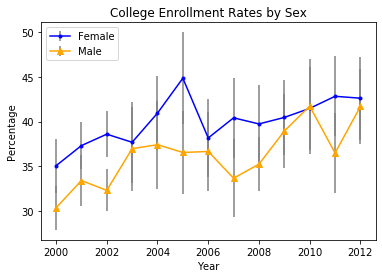

In [7]:
# Build a scatter plot for each data type
fig, ax = plt.subplots()
ax.errorbar(df1["Year"], df1['Female'], ser_df['Female'], marker=".", color = "b", ecolor='gray')
ax.errorbar(df1["Year"], df1["Male"], ser_df["Male"], marker="^", color = "orange", ecolor='gray')


# Incorporate the other graph properties
plt.title("College Enrollment Rates by Sex")
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.legend(['Female','Male'], loc = "upper left", fontsize = "medium")

# Save the figure
plt.savefig("CollegeBySex.png")

# Show plot
plt.show()